<div style="background-color: lightblue;">
    
# Digital House - Data Science a Distancia

## Trabajo Final

### Autores: Daniel Borrino, Ivan Mongi, Jessica Polakoff, Julio Tentor
    
<p style="text-align:right;">Agosto 2022</p>

---
</div>    

---
# Objetivo del Trabajo Final

<h4 style="text-align:center;">Demostrar que aprendimos conceptos y desarrollamos habilidades para obtener un modelo de aprendizaje automático que razonablemente predice un valor</h4>

---
### Contexto

???

---
### Metas

1. Lograr un modelo o modelos de aprendizaje automático que ???.

2. Presentar la conclusión del trabajo y los aspectos relevantes del desarrollo realizado


---
#### Aspectos técnicos

La notebook se ejecuta correctamente en una instalación estándar de Anaconda versión *4.13.0 build  3.21.6, Python 3.9.7*


---

#### Necessary libraries


In [1]:
import pandas as pd
import numpy as np


In [2]:
# to avoid some warnings messages
import warnings
warnings.filterwarnings('ignore')


#### Style

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
sns.set()
plt.style.use('classic')
sns.mpl.rcParams['axes.titlesize'] = 18
sns.mpl.rcParams['axes.labelsize'] = 14


In [5]:
# to use HTML codes within IPpython.display function
from IPython.display import HTML


In [6]:
import pandas as pd

def data_generator() :
    u'''Data generator for final work of data science at digital house
    
    
    
    Returns one dataset
    '''

    data = pd.read_csv('./data/chocolate_bars.csv')

    # remove duplicates and missing values
    data.dropna(axis='index', how='any', inplace=True)
    data.drop_duplicates(inplace=True)
    # set sequential and successive index values
    data.reset_index(drop=True)

    
    def get_rating_label(rating_value) :
        u'''
        '''
        if rating_value >= 1.0 and rating_value <= 1.9 :
            return 0
        if rating_value >= 2.0 and rating_value <= 2.9 :
            return 1
        if rating_value >= 3.0 and rating_value <= 3.49 :
            return 2
        if rating_value >= 3.5 and rating_value <= 3.9 :
            return 3
        if rating_value >= 4.0 and rating_value <= 5.0 :
            return 4
        return -1
#


    # 
    data['rating_tag'] = data['rating'].apply(get_rating_label)
    data = data.astype({'rating_tag' : 'category'})
    
    return data

---

### Useful functions


In [7]:
def get_types_nulls_and_describe(data) :
    u''' Gets DataFrame data types, count of null values and statistical descriptions for each feature
    
    args
        data : pandas DataFrame

    returns
        pandas DataFrame
    '''

    result = data.describe(include='all').transpose()
    result.insert(0, 'nulls', data.isnull().sum().values)
    result.insert(0, 'types', data.dtypes)

    return result

In [8]:
def show_dataframe_basic_info(data) :
    u''' Show DataFrame basic information
    
    args
        data : pandas DataFrame

    returns
        None
    '''

    # shape
    display(HTML('<hr><h4>Cantidad de datos</h4>'))
    display(HTML('<h5>' + str(data.shape[0]) +' observaciones con ' + str(data.shape[1]) + ' características</h5>'))

    # data types and null values counts
    display(HTML('<hr><h4>Tipos de datos, valores nulos y detalle de cada característica</h4>'))
    display(get_types_nulls_and_describe(data))

    # describe all features
    # display(HTML('<hr><h4>Detalles de cada característica</h4>'))
    # display(data.describe(include='all').transpose())

    # show data
    display(HTML('<hr><h4>Algunos datos</h4>'))
    display(data)

    return

In [9]:
def set_figure(row, col, suptitle) :
    u''' Activate matplot figure setting size and super title
    '''
    fig = plt.figure(figsize=(row, col));
    fig.suptitle(suptitle, 
                 verticalalignment='center', fontsize='xx-large', fontweight='extra bold');
    return fig

---
<a id="Dataset"></a>

### Conjunto de datos - Dataset

Los datos originales son de [Manhattan Chocolate Society](http://flavorsofcacao.com/mcs_index.html)

El conjunto de datos se obtuvo de la [competencia en Datacamp](https://app.datacamp.com/learn/competitions/chocolate-bar-ratings) finalizada el 30 de junio de 2022.

---

*Las características en el conjunto de datos original son*:

    - id                   : Identificador de la revisión de la barra de chocolate
    - manufacturer         : Nombre del manufactorador de la barra de chocolate
    - company_location     : Ubicación del manufactorador de la barra de chocolate
    - year_reviewed        : Año de la revisión de 2006 al 2021
    - bean_origin          : Origen del grano de cacaco
    - bar_name             : Nombre de la barra de chocolate
    - cocoa_percent        : Porcentaje de cacaco en la barra de chocolate
    - num_ingredients      : Número de ingredientes en la barra de chocolate
    - ingredients          : Ingredientes (ver codificación)
    - review               : Revisión, análisis o evaluación de la barra de chocolate
    - rating               : Clasificación (ver escala)
    

*Codificación de ingredientes en la barra de chocolate*

    - B  : Beans (grano)
    - S  : Sugar (azucar)
    - S* : Sweetener (edulcolrante distinto de azucar)
    - C  : Cocoa Butter (mantequilla de cacaco)
    - V  : Vanilla (vainilla)
    - L  : Lecithin (lecitina)    
    - Sa : Salt (sal)

*Escala de clasificación de una barra de chocolate*

    - 1.0  a 1.9  : Unpleasant (Desagradable)
    - 2.0  a 2.9  : Disappointing (Decepcionante)
    - 3.0  a 3.49 : Recommended (Recomendable)
    - 3.5  a 3.9  : Highly Recommended (Altamente Recomendable)
    - 4.0  a 5.0  : Oustanding (Sobresaliente)

---


In [10]:
# Generar los datos para el trabajo final
# data = data_generator()

# read dataset
data = pd.read_csv('./data/chocolate_bars.csv')

# remove duplicates
data.drop_duplicates(inplace=True)
# set sequential and successive index values
data.reset_index(drop=True, inplace=True)


---
<a id="Exploratory_data_analysis_01"></a>

### Conjunto de datos - Dataset



In [11]:
# show basic information about data
show_dataframe_basic_info(data)

,types,nulls,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,int64,0,2530.0,NaN,NaN,NaN,1429.800791,757.648556,5.0,802.0,1454.0,2079.0,2712.0
manufacturer,object,0,2530,580,Soma,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_location,object,0,2530,67,U.S.A.,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_reviewed,int64,0,2530.0,NaN,NaN,NaN,2014.374308,3.968267,2006.0,2012.0,2015.0,2018.0,2021.0
bean_origin,object,0,2530,62,Venezuela,253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bar_name,object,0,2530,1605,Madagascar,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cocoa_percent,float64,0,2530.0,NaN,NaN,NaN,71.639723,5.616724,42.0,70.0,70.0,74.0,100.0
num_ingredients,float64,87,2443.0,NaN,NaN,NaN,3.041343,0.913728,1.0,2.0,3.0,4.0,6.0
ingredients,object,87,2443,21,"B,S,C",999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review,object,0,2530,2487,"spicy, cocoa",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"B,S,C","fatty, mild nuts, mild fruit",3.25


---
#### Observaciones

- La característica 'ingredients' se puede completar con el **valor más frecuente**
- La característica 'num_ingredients' se puede completar con el **número de valores diferentes de la característica 'ingredients'**

---

---

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.base import RegressorMixin
from sklearn.base import ClassifierMixin

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

In [ ]:
def ingredients_imputer(data) :
    u''' Imputer for 'ingredients' and 'num_ingredients' features
    
    Original idea from Shahriar Rahman https://app.datacamp.com/profile/mdshahriar983
    '''
    imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    imputer.fit(data[['ingredients']])
    data[['ingredients']] = imputer.transform(data[['ingredients']])
    data['num_ingredients'] = data['ingredients'].apply( lambda x : len( [t for t in x.replace(' ','').split(sep=',')] ) )
    
    return 

ingredients_imputer(data)

In [14]:
class FeatureSelection(BaseEstimator, TransformerMixin) :
    u''' Transformer to selecte some features
    '''
    
    def __init__(self, selected_features) -> None :
        self.selected_features=selected_features
    
    def fit(self, X, y=None) :
        if not isinstance(X, pd.DataFrame) :
            raise TypeError('This transformer needs a pandas DataFrame')
        
        return self
    
    def transform(self, X, y=None) :
        if not isinstance(X, pd.DataFrame) :
            raise TypeError('This transformer needs a pandas DataFrame')
        
        return X[self.selected_features]
    

In [37]:
class PreProcess_Ingredients(BaseEstimator, TransformerMixin) :
    u''' Transformer to preprocess 'ingredients' and 'num_ingredients' features
    '''
    
    def __init__(self) -> None :
        return None
    
    def fit(self, X, y=None) :
        if not isinstance(X, pd.DataFrame) :
            raise TypeError('This transformer needs a pandas DataFrame')
        return self
    
    def transform(self, X, y=None):
        if not isinstance(X, pd.DataFrame) :
            raise TypeError('This transformer needs a pandas DataFrame')
            
        # TODO: learn how to do this in Pipeline
        self.imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        self.imputer.fit(X[['ingredients']])
        X[['ingredients']] = self.imputer.transform(X[['ingredients']])
        X['num_ingredients'] = X['ingredients'].apply( lambda x : len( [t for t in x.replace(' ','').split(sep=',')] ) )
        
        return X

In [38]:
# imput 'ingredients' and 'num_ingredients' features
_ = PreProcess_Ingredients().fit_transform(data)

In [39]:
show_dataframe_basic_info(data)

,types,nulls,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,int64,0,2530.0,NaN,NaN,NaN,1429.800791,757.648556,5.0,802.0,1454.0,2079.0,2712.0
manufacturer,object,0,2530,580,Soma,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_location,object,0,2530,67,U.S.A.,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_reviewed,int64,0,2530.0,NaN,NaN,NaN,2014.374308,3.968267,2006.0,2012.0,2015.0,2018.0,2021.0
bean_origin,object,0,2530,62,Venezuela,253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bar_name,object,0,2530,1605,Madagascar,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cocoa_percent,float64,0,2530.0,NaN,NaN,NaN,71.639723,5.616724,42.0,70.0,70.0,74.0,100.0
num_ingredients,int64,0,2530.0,NaN,NaN,NaN,3.039921,0.897906,1.0,2.0,3.0,4.0,6.0
ingredients,object,0,2530,21,"B,S,C",1086,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review,object,0,2530,2487,"spicy, cocoa",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4,"B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3,"B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3,"B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3,"B,S,C","fatty, mild nuts, mild fruit",3.25


---

In [42]:
data['manufacturer'].value_counts()

Soma                                   56
Fresco                                 39
Arete                                  32
Bonnat                                 30
A. Morin                               26
                                       ..
Rancho San Jacinto                      1
Raoul Boulanger                         1
Raw Cocoa                               1
Heirloom Cacao Preservation (Mindo)     1
Manifesto Cacao                         1
Name: manufacturer, Length: 580, dtype: int64

---

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

def My_MultiLabel(data, col, classes=None, prefix=None) :
    u''' Converts the values from some feature to a multilabel binary matrix
    
    Takes all comma separated values from one feature in each row and generate a 
    multi label binary matrix that has the same number of rows and as many series 
    as distintct values was found in all rows of the feature
    
    Args
    
    Return
    
    '''
    
    work = pd.DataFrame(data[col])
    work['text'] = work[col].apply( lambda x : set( [t for t in x.lower().replace(' ','').split(sep=',')] ) )

    mlb = MultiLabelBinarizer(classes=classes)
    work = pd.DataFrame(mlb.fit_transform(work['text']))
    
    labels = mlb.classes_
    if prefix != None :
        for i in range(len(labels)) :
            labels[i] = prefix + labels[i]
    work.columns = labels
    
    
    return work

In [ ]:
def ingredients_process(data) :
    u'''
    
    
    '''
    classes = np.array(['b', 'c', 'l', 's', 's*', 'sa', 'v'])
    work = My_MultiLabel(data=data, col='ingredients', classes=classes, prefix=None)
    work.rename(columns={'b'  : 'i_beans',
                         'c'  : 'i_cocoa_butter',
                         'l'  : 'i_lecithin',
                         's'  : 'i_sugar',
                         's*' : 'i_sweetener',
                         'sa' : 'i_salt',
                         'v'  : 'i_vanilla'
                        }, inplace=True)
    return work

In [ ]:
# work = ingredients_process(data)
# work.reset_index(drop=True)
# work.index = data.index

# ingredients_features = list(work.columns)

In [ ]:
# pepe = pd.concat([data, work], axis='columns', ignore_index=True)
# pepe.columns = list(data.columns) + list(work.columns)


---

In [40]:
def show_corr(data, target) :
    u'''
    '''
    
    corr = data.corr()
    cols = corr[target].sort_values(ascending=False).keys()
    
    topc = corr.loc[cols, cols]
    mask = np.zeros_like(topc)
    mask[np.triu_indices_from(mask)] = True
    
    sns.heatmap(data=topc, 
                cmap=sns.diverging_palette(h_neg=350, h_pos=150, center='light', as_cmap=True), 
                center=0, linewidths=1, annot=True, fmt=".3f", cbar=False, mask=mask)

    return

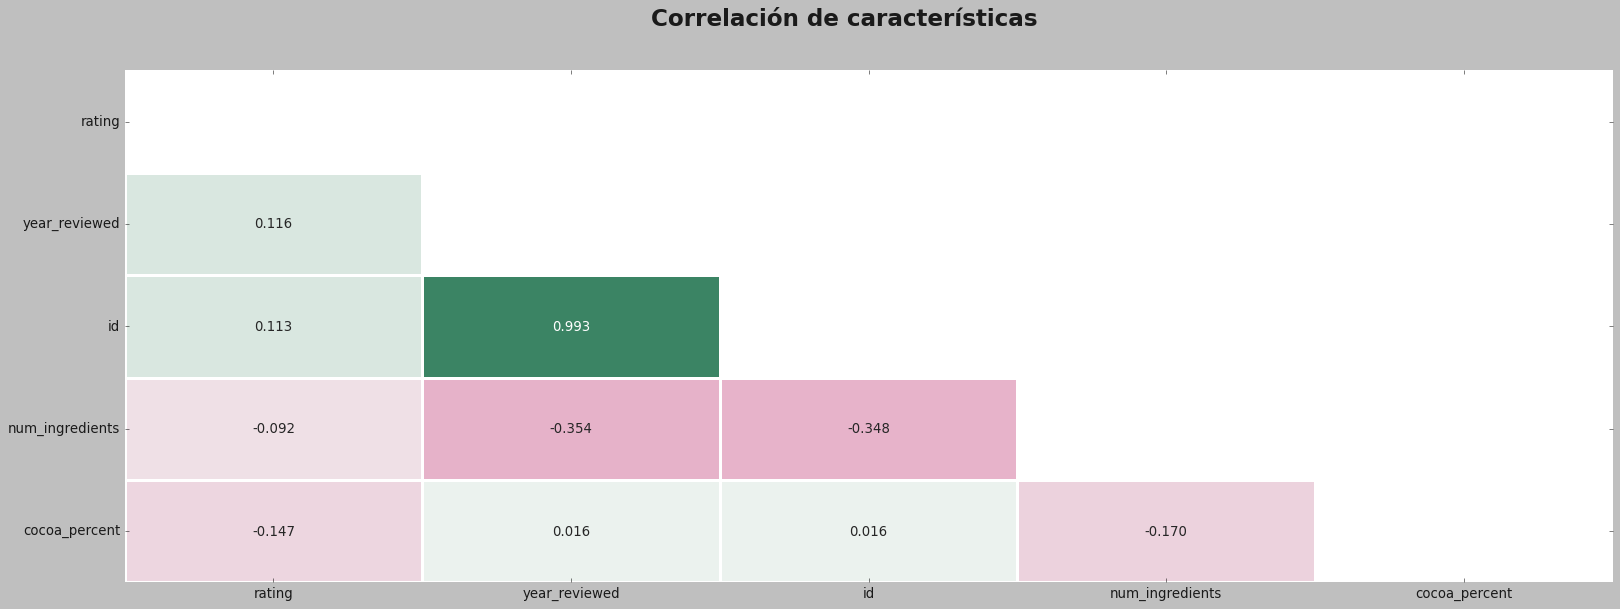

In [41]:

fig = set_figure(24, 8, 'Correlación de características')
show_corr(data, 'rating')


---



In [ ]:
 # _ = sns.pairplot(data, kind="reg", diag_kind="kde")

---


In [ ]:

from sklearn.naive_bayes import CategoricalNB

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# need for some models
from sklearn.preprocessing import StandardScaler


from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix


class Model() :
    u'''
    Models plain object, used to keep values for each model
    '''
    
    def __init__(self, name, model, scaler=None, gs_params=None) :
        u'''
        Object intializacion
        
        args
            name : text name of model
            model : model instance
            scaler : scaler instance, apply only if not None
        
        '''
    
        self.name = name
        self.model = model
        self.scaler = scaler
        self.isfit = False
        
        self.gs_params = gs_params
        self.gs_model = None
        self.gs_isfit = False
        
        self.accuracy = 0
        self.precision = 0
        self.recall = 0
        self.f1 = 0
        self.auc_roc = 0
        
        self.confusion = None
        self.classification_report = None
        
        self.fpr = None
        self.tpr = None
        self.fpr_proba = None
        self.tpr_proba = None
        
        return
    

    def train(self, X_data, y_data) :
        u'''
        Train model
        '''

        if self.gs_model == None : # not have a gridsearch model
            if self.scaler == None : # not need to scaler
                self.model.fit(X_data, y_data)
            else :
                self.model.fit(self.scaler.fit_transform(X_data), y_data)
            self.isfit = True
        else :
            if self.scaler == None :
                self.gs_model.fit(X_data, y_data)
            else :
                self.gs_model.fit(self.scaler.fit_transform(X_data), y_data)
            self.isfit = True
            self.gs_isfit = True
            
        return
    
    
    def predict(self, X_data, y_data, target_names=None) :
        u'''
        Predict values
        '''
        
        if not self.isfit :
            raise Exception('MODELO NO ENTRENADO ...')
            
        if not self.gs_isfit :
            if self.scaler == None :
                y_pred = self.model.predict(X_data)
                y_pred_proba = self.model.predict_proba(X_data)
            else :
                y_pred = self.model.predict(self.scaler.fit_transform(X_data))
                y_pred_proba = self.model.predict_proba(m.scaler.fit_transform(X_data))
        else :
            if self.scaler == None :
                y_pred = self.gs_model.predict(X_data)
                y_pred_proba = self.gs_model.predict_proba(X_data)
            else :
                y_pred = self.gs_model.predict(self.scaler.fit_transform(X_data))
                y_pred_proba = self.gs_model.predict_proba(m.scaler.fit_transform(X_data))
                
        self.accuracy = metrics.accuracy_score(y_data, y_pred)
        # self.precision = metrics.precision_score(y_data, y_pred)
        # self.recall = metrics.recall_score(y_data, y_pred)
        # self.f1 = metrics.f1_score(y_true=y_data, y_pred=y_pred)
        
        # self.fpr, self.tpr, _ = metrics.roc_curve(y_data, y_pred)
        # self.auc_roc = metrics.auc(self.fpr, self.tpr)
        
        self.confusion = confusion_matrix(y_data, y_pred)
        self.classification_report = classification_report(y_data, y_pred, 
                                                           digits=6, 
                                                           target_names=target_names, 
                                                           output_dict=False)

        # self.fpr_proba, self.tpr_proba, _ = metrics.roc_curve(y_data, y_pred_proba[:, 1])

        return y_pred


---

### Some names and lists useful

In [ ]:


target = 'rating_tag'
target_names = ['Unpleasant', 'Disappointing', 'Recommended', 'Highly Recommended', 'Oustanding']

categorical_features = ['manufacturer', 'company_location', 'bean_origin', 'bar_name', 'ingredientes', 'review']
numeric_features = ['cocoa_percent']
ordinal_features = ['id', 'year_reviewed', 'num_ingredients']

In [ ]:
base_line_features = numeric_features + ingredients_features

---



In [ ]:

from sklearn.model_selection import train_test_split


X = data[base_line_features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test :", y_test.shape)

---
<a name="Evaluate_some_models"></a>

### Evaluate some models

In [ ]:
# definir los modelos a entrenar
models = []

models.append( Model(name='Naive Bayes Categorical', model=CategoricalNB(), ) )
models.append( Model(name='Árbol de Decisión', model=DecisionTreeClassifier(random_state=0) ) )
# models.append( Model(name='Gradiente Booster', model=GradientBoostingClassifier() ) )

In [ ]:

for m in models :
    m.train(X_train, y_train)

for m in models :
    m.predict(X_test, y_test, target_names=target_names)

for m in models :
    display(HTML('<b>' + m.name + '</b>'))
    print(m.classification_report)
    


---



---

